Library Decision Tree

In [19]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading dataset

In [20]:
# Membaca File CSV
df = pd.read_csv('../data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [21]:
# Menampilkan Informasi umum data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


Data Preprocessing

In [22]:
# Cek missing value
df.isnull().sum()

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64

In [23]:
# Cek dan hapus data duplikat
df.duplicated().sum()

np.int64(7308)

In [24]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [25]:
# Mengubah nama kolom 
df = df.rename(columns={
    'Jenis Kelamin' : 'jenis_kelamin',
    'Umur (bulan)' : 'umur_bulan',
    'Tinggi Badan (cm)' : 'tinggi_cm',
    'Berat Badan (kg)' : 'berat_kg',
    'Stunting' : 'stunting',
    'Wasting' : 'wasting'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


Data Understanding

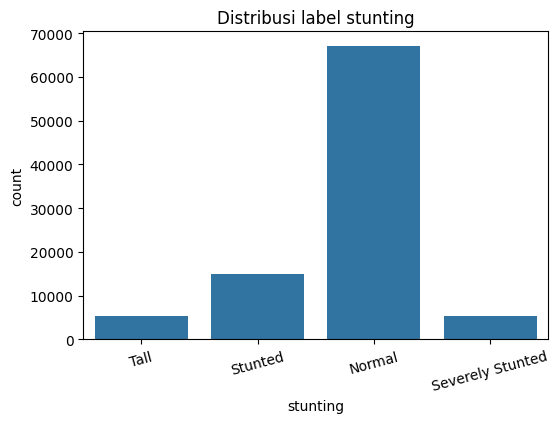

In [26]:
# Visualisasi Distribusi Label Target (Stunting)
plt.figure(figsize=(6, 4))
sns.countplot(x= 'stunting', data=df)
plt.title('Distribusi label stunting')
plt.xticks(rotation=15)
plt.show()

Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [27]:
# Mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) # urutan kelas
df['stunting'] = stunting_cat.cat.codes # y numerik

# Fitur kategorikal lain (jenis_kelamin, wasting) -> kode juga
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


Analisis Korelasi Antar Fitur 

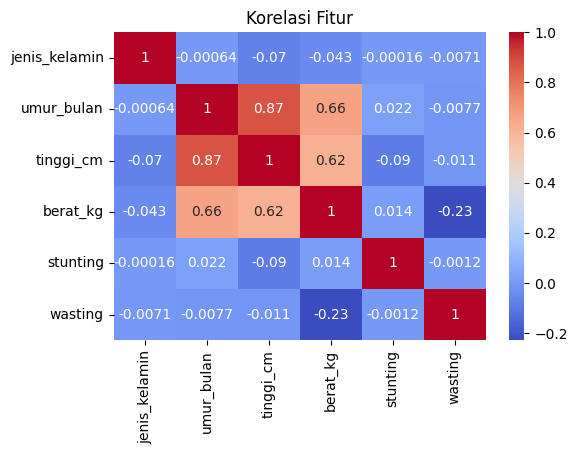

In [28]:
# Korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

Splitting Data (Pembagian Data Training dan Testing) 

In [29]:
# Memilih fitur dan target 
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(74153, 18539)

Pembuatan Model Decision Tree

In [30]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluasi Model Decision Tree

In [31]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



Visualisasi Hasil Model Decision Tree

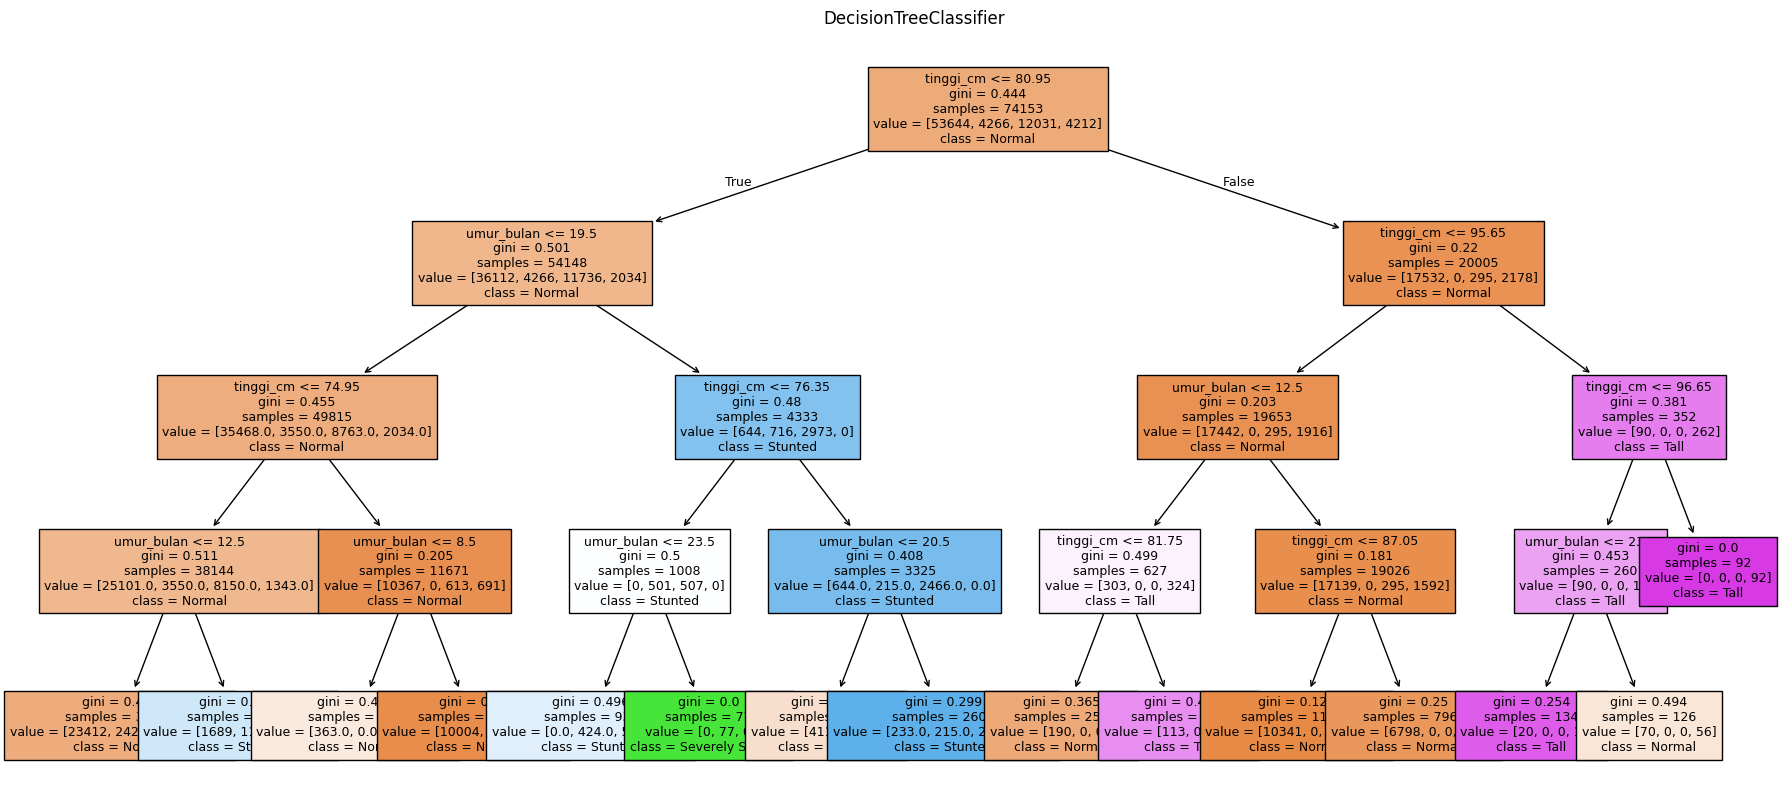

In [ ]:
# Visualisasi Model
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes, # Kembali ke nama kelas asli
    filled=True,
    fontsize=9
)
plt.title("DecisionTreeClassifier")
plt.show()

Feature Importance (Fitur yang Paling Berpengaruh) 

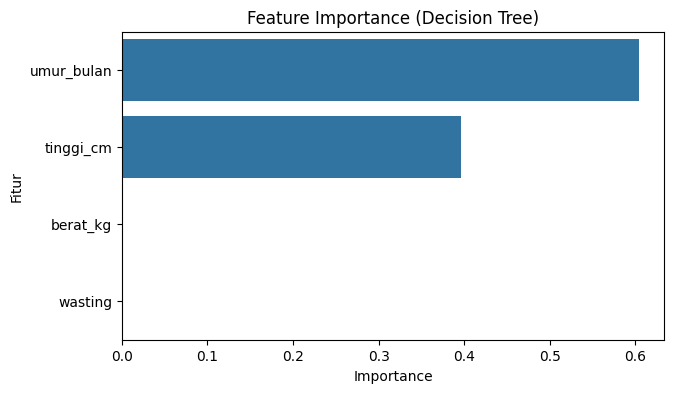

umur_bulan    0.603752
tinggi_cm     0.396248
berat_kg      0.000000
wasting       0.000000
dtype: float64

In [36]:
# Fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

Hyperparameter Tuning (Menentukan max_depth Terbaik) 

In [38]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 8 | Acc: 84.22 %
